# Project Two
## Work Done by Joshua Duarte

---


## Code P2.1

In [46]:
'''#Intro to Neural Network Modeling 
# Python Neural Network Model of Spray Cooling Test System

>>>>> start CodeP2.1F22
    V.P. Carey, ME249, Fall 2022'''

# version 3 print function
from __future__ import print_function

# import math, numpy and other usefuk packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values 
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

#start of batch loop  

for k in range (0,200):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1+b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2+b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti + dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti + dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti + dE3da3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti + dE3da3*sigp3*a2
        dE3db3ti = dE3db3ti + dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    gam = 0.05
    if E3 < 0.07: 
        gam = 0.008

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount, 'rms fractional error =', E3**0.5)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    
    #quit if squared error is below target
    if E3 < 0.00034:
        break
    

print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    


[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.23 0.4 0.7 0.72 0.7
-0.15 -0.12 0.01
E3 =  0.0023304004322608684 icount = 8 rms fractional error = 0.048274221197869865
next ws: 1.2296434158887675 0.39957113223001967 0.699579524559478 0.7198734737335699 0.6998677891900275
next bs: -0.15042093558581818 -0.12030307362178909 0.009787848464747631
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.2296434158887675 0.39957113223001967 0.699579524559478 0.71987

--- 
### Task 1.1

In [49]:
print ('E3 = ', E3, 'icount =', icount, 'rms fractional error =', E3**0.5)
print('')
print ('last w01, w02, w03, w12, w23:')
print (w01, w02, w03, w12, w23)
print ('last b1, b2, b3:')
print (b1, b2, b3)
print ('')
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
fpPredicted = []
ydataList = []
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3
    fpPredicted.append(a3*32.4)
    ydataList.append(xydatar[i][3])

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    
print('')    
print(fpPredicted)

E3 =  0.00032528839043788473 icount = 8 rms fractional error = 0.018035753115350762

last w01, w02, w03, w12, w23:
1.216357733025874 0.4125302702148731 0.6884058318375348 0.714042336036248 0.6939304618676472
last b1, b2, b3:
-0.16095176378660467 -0.127856005074306 0.004522231198836544

Tdbin, Twbin, qdot, Tdbout, ypredicted:
20.0 13.0 310.8 30.97 31.111950636608388
20.0 14.5 308.0 32.3 31.696596380009723
20.0 15.3 306.0 31.5 31.990227141614145
20.2 13.0 310.8 30.91 31.305292042148874
20.0 14.5 308.0 32.5 31.696596380009723
20.0 15.3 306.0 31.4 31.990227141614145
24.0 13.0 310.8 35.59 34.97877874741809
36.0 14.5 308.0 46.4 47.163908823248555

[31.111950636608388, 31.696596380009723, 31.990227141614145, 31.305292042148874, 31.696596380009723, 31.990227141614145, 34.97877874741809, 47.163908823248555]


---
## Code P2.2

### Task 1.2 a

In [25]:
'''>>>>> start CodeP2.2F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [26]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])


#set starting values to those used in first principles model
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)


print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
model.layers


(3, 1)
(1, 1)
(1, 1)
Weights and biases of the layers before training the model: 

dense_one
Weights
Shape:  (3, 1) 
 [[1.23]
 [0.4 ]
 [0.7 ]]
Bias
Shape:  (1,) 
 [-0.15] 

dense_two
Weights
Shape:  (1, 1) 
 [[0.72]]
Bias
Shape:  (1,) 
 [-0.12] 

dense_three
Weights
Shape:  (1, 1) 
 [[0.7]]
Bias
Shape:  (1,) 
 [0.01] 



In [34]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [35]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
1/1 [==============================] - 0s 465ms/step - loss: 0.0198
Epoch 2/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 3/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 5/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 6/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 8/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 13/400
1/1 [==============================] - 0s 3ms/

In [36]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

[[1.2239491]
 [0.2895847]
 [0.7234253]]
w01 =  1.2239491 w02 =  0.2895847 w03 =  0.7234253
[-0.14015044]
b1 =  [-0.14015044]
[[0.70647335]]
w12 =  0.70647335
[-0.10168917]
b2 =  [-0.10168917]
[[0.6799924]]
w23 =  0.6799924
[0.03707751]
b3 =  [0.03707751]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.9581756]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.96940756]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.9748261]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.9639972]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.96940756]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.9806477]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.0746076]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.435135]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[31.044891]]
20.0 14.5 308.0 32

---
### Task 1.2 b

In [44]:
print ('x01,  x02,   x03,  y3,  a3*32.4:')
kerasPredicted = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    kerasPredicted.append(float(a3*32.4))
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)
    
print('')
print('smallest loss =', np.min(loss_hist))
print('')
#print(kerasPredicted)

x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[31.044891]]
20.0 14.5 308.0 32.29900311718774 [[31.408806]]
20.0 15.3 306.0 31.499027807783705 [[31.584368]]
20.2 13.0 310.8 30.909046017098234 [[31.233511]]
20.0 14.5 308.0 32.498996944538746 [[31.408806]]
20.2 15.3 306.0 31.3990308941082 [[31.772987]]
23.999999999999996 13.0 310.8 35.58890157711182 [[34.817287]]
36.0 14.5 308.0 46.398567945433776 [[46.498375]]

smallest loss = 0.01374276727437973

[31.044891357421875, 31.40880584716797, 31.584367752075195, 31.233510971069336, 31.40880584716797, 31.772987365722656, 34.81728744506836, 46.498374938964844]


---
### Task 1.2 c

[30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
[31.111950636608388, 31.696596380009723, 31.990227141614145, 31.305292042148874, 31.696596380009723, 31.990227141614145, 34.97877874741809, 47.163908823248555]
[31.044891357421875, 31.40880584716797, 31.584367752075195, 31.233510971069336, 31.40880584716797, 31.772987365722656, 34.81728744506836, 46.498374938964844]



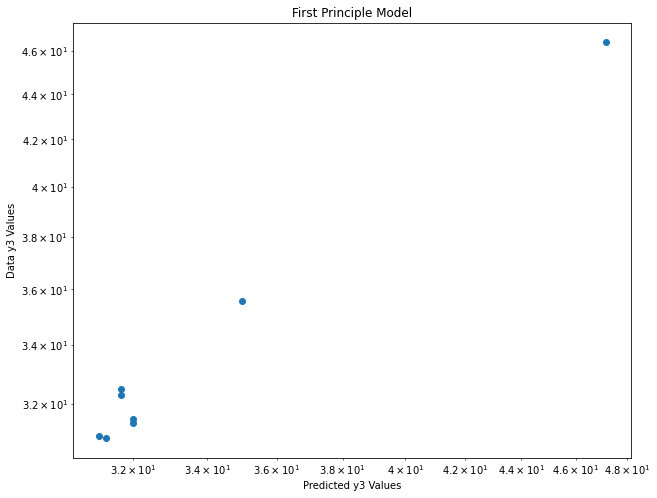

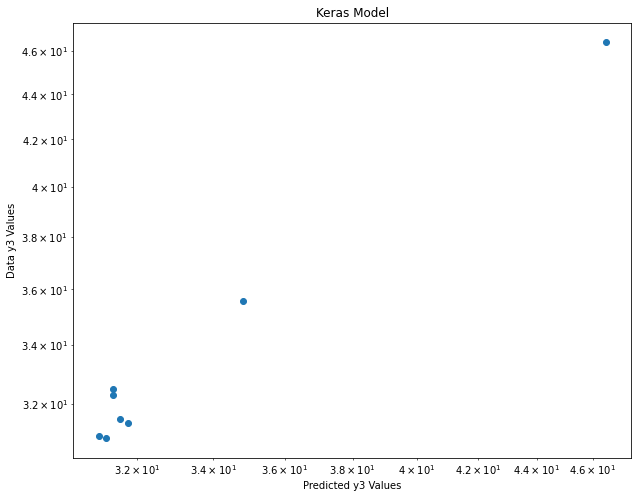

In [52]:
print(ydataList)
print(fpPredicted)
print(kerasPredicted)
print('')

plt.scatter(fpPredicted, ydataList)
plt.title('First Principle Model')
plt.xlabel('Predicted y3 Values')
plt.ylabel('Data y3 Values')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()

plt.scatter(kerasPredicted, ydataList)
plt.title('Keras Model')
plt.xlabel('Predicted y3 Values')
plt.ylabel('Data y3 Values')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()

---
### Task 1.2 d

In [53]:
'''>>>>> start CodeP2.2F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [54]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])


#set starting values to those used in first principles model
w01n =  1.23 * 1.2
w02n =  0.40 * 1.2
w03n =  0.70 * 1.2
b1n =  -0.15 * 1.2
w12n =  0.72 * 1.2
b2n =  -0.12 * 1.2
w23n =  0.7 * 1.2
b3n =  0.01 * 1.2

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)


print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
model.layers


(3, 1)
(1, 1)
(1, 1)
Weights and biases of the layers before training the model: 

dense_one
Weights
Shape:  (3, 1) 
 [[1.476]
 [0.48 ]
 [0.84 ]]
Bias
Shape:  (1,) 
 [-0.18] 

dense_two
Weights
Shape:  (1, 1) 
 [[0.864]]
Bias
Shape:  (1,) 
 [-0.144] 

dense_three
Weights
Shape:  (1, 1) 
 [[0.84]]
Bias
Shape:  (1,) 
 [0.012] 



In [60]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [61]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
1/1 [==============================] - 0s 374ms/step - loss: 0.0182
Epoch 2/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0657
Epoch 3/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 6/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 7/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 8/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 12/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 13/400
1/1 [==============================] - 0s 2ms/

In [62]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

[[1.2525225 ]
 [0.31262684]
 [0.85114336]]
w01 =  1.2525225 w02 =  0.31262684 w03 =  0.85114336
[-0.18649891]
b1 =  [-0.18649891]
[[0.70963174]]
w12 =  0.70963174
[-0.14175826]
b2 =  [-0.14175826]
[[0.66086984]]
w23 =  0.66086984
[0.02373085]
b3 =  [0.02373085]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.95840883]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.96994704]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.97544414]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.96422464]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.96994704]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.98125994]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.0747257]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.435215]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[31.052448]]
20.0 14

---
## Code P2.3

In [5]:
'''>>>>> start CodeP2.3F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Data arrays for hybrid solar/fossil-fuel gas turbine power system'''

import statistics

#create input data array, normalizing input temp
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])



ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

print('Data In Dimensional Form')
print('xdata =', xdata)
print()
print('ydata =', ydata)
print()

#Normalization of Data

#Determine Median Value for xdata
t1Values = []
gammaValues = []
qsolValues = []

for i in range(len(xdata)):
    t1Values.append(xdata[i][0])
    gammaValues.append(xdata[i][1])
    qsolValues.append(xdata[i][2])

tmed = statistics.median(t1Values)
gamed = statistics.median(gammaValues)
qsmed = statistics.median(qsolValues)
    
for i in range(len(xdata)):
    xdata[i][0] = xdata[i][0] / tmed
    xdata[i][1] = xdata[i][1] / gamed
    xdata[i][2] = xdata[i][2] / qsmed
    
    
#Determine Median Value for ydata
alphaValues = []
nsysValues = []

for i in range(len(ydata)):
    alphaValues.append(ydata[i][0])
    nsysValues.append(ydata[i][1])

almed = statistics.median(alphaValues)
efmed = statistics.median(nsysValues)
    

for i in range(len(ydata)):
    ydata[i][0] = ydata[i][0] / almed
    ydata[i][1] = ydata[i][1] / efmed
    
    

print('Data In Normalized Form')
print('xdata =', xdata)
print()
print('ydata =', ydata)
print()



Data In Dimensional Form
xdata = [[318.0, 0.0, 500.0], [318.0, 0.0, 1000.0], [318.0, 0.0, 1500.0], [318.0, 0.0, 2000.0], [318.0, 0.0, 2500.0], [318.0, 0.25, 500.0], [318.0, 0.25, 1000.0], [318.0, 0.25, 1500.0], [318.0, 0.25, 2000.0], [318.0, 0.25, 2500.0], [318.0, 0.5, 500.0], [318.0, 0.5, 1000.0], [318.0, 0.5, 1500.0], [318.0, 0.5, 2000.0], [318.0, 0.5, 2500.0], [303.0, 0.0, 500.0], [303.0, 0.0, 1000.0], [303.0, 0.0, 1500.0], [303.0, 0.0, 2000.0], [303.0, 0.0, 2500.0], [303.0, 0.25, 500.0], [303.0, 0.25, 1000.0], [303.0, 0.25, 1500.0], [303.0, 0.25, 2000.0], [303.0, 0.25, 2500.0], [303.0, 0.5, 500.0], [303.0, 0.5, 1000.0], [303.0, 0.5, 1500.0], [303.0, 0.5, 2000.0], [303.0, 0.5, 2500.0], [288.0, 0.0, 500.0], [288.0, 0.0, 1000.0], [288.0, 0.0, 1500.0], [288.0, 0.0, 2000.0], [288.0, 0.0, 2500.0], [288.0, 0.25, 500.0], [288.0, 0.25, 1000.0], [288.0, 0.25, 1500.0], [288.0, 0.25, 2000.0], [288.0, 0.25, 2500.0], [288.0, 0.5, 500.0], [288.0, 0.5, 1000.0], [288.0, 0.5, 1500.0], [288.0, 0.5, 2

## Code P2.4
### Task 2.2 a

In [69]:
'''>>>>> start CodeP2.4F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import statistics
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
from tensorflow import keras
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
# meadian values of input variables
'''Tmed = 293.
gamed = 0.25
qsmed = 1250.'''
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0, 0.0, 500.0], [ 318.0, 0.0, 1000.0]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])



'''#convert to:
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])'''

t1Values = []
gammaValues = []
qsolValues = []

for i in range(len(xdata)):
    t1Values.append(xdata[i][0])
    gammaValues.append(xdata[i][1])
    qsolValues.append(xdata[i][2])

tmed = statistics.median(t1Values)
gamed = statistics.median(gammaValues)
qsmed = statistics.median(qsolValues)
    
for i in range(len(xdata)):
    xdata[i][0] = xdata[i][0] / tmed
    xdata[i][1] = xdata[i][1] / gamed
    xdata[i][2] = xdata[i][2] / qsmed

xarray= np.array(xdata)
print (xdata)
print (xarray)
# meadian values of output variables
'''almed = 60.
efmed = 0.4'''
# alpha, effsys
ydata = []
ydata =  [[ 35.1316, 0.3808], [ 40.3764, 0.38686]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

'''#convert to:
ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])'''

alphaValues = []
nsysValues = []

for i in range(len(ydata)):
    alphaValues.append(ydata[i][0])
    nsysValues.append(ydata[i][1])

almed = statistics.median(alphaValues)
efmed = statistics.median(nsysValues)
    

for i in range(len(ydata)):
    ydata[i][0] = ydata[i][0] / almed
    ydata[i][1] = ydata[i][1] / efmed

yarray= np.array(ydata)
print (ydata)
print (yarray)

[[1.0761421319796953, 0.0, 0.3333333333333333], [1.0761421319796953, 0.0, 0.6666666666666666], [1.0761421319796953, 0.0, 1.0], [1.0761421319796953, 0.0, 1.3333333333333333], [1.0761421319796953, 0.0, 1.6666666666666667], [1.0761421319796953, 1.0, 0.3333333333333333], [1.0761421319796953, 1.0, 0.6666666666666666], [1.0761421319796953, 1.0, 1.0], [1.0761421319796953, 1.0, 1.3333333333333333], [1.0761421319796953, 1.0, 1.6666666666666667], [1.0761421319796953, 2.0, 0.3333333333333333], [1.0761421319796953, 2.0, 0.6666666666666666], [1.0761421319796953, 2.0, 1.0], [1.0761421319796953, 2.0, 1.3333333333333333], [1.0761421319796953, 2.0, 1.6666666666666667], [1.0253807106598984, 0.0, 0.3333333333333333], [1.0253807106598984, 0.0, 0.6666666666666666], [1.0253807106598984, 0.0, 1.0], [1.0253807106598984, 0.0, 1.3333333333333333], [1.0253807106598984, 0.0, 1.6666666666666667], [1.0253807106598984, 1.0, 0.3333333333333333], [1.0253807106598984, 1.0, 0.6666666666666666], [1.0253807106598984, 1.0,

In [70]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(16, activation=K.relu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(32, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation =K.relu, kernel_initializer = initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [71]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [75]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 2/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 3/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 4/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 5/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 6/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 7/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 8/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 9/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 10/600
2/2 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 11/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 12/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 13/600
2/2 [==============================] - 0s 2ms/st

---
### Task 2.2 b

[268.         269.72413793 271.44827586 273.17241379 274.89655172
 276.62068966 278.34482759 280.06896552 281.79310345 283.51724138
 285.24137931 286.96551724 288.68965517 290.4137931  292.13793103
 293.86206897 295.5862069  297.31034483 299.03448276 300.75862069
 302.48275862 304.20689655 305.93103448 307.65517241 309.37931034
 311.10344828 312.82758621 314.55172414 316.27586207 318.        ]


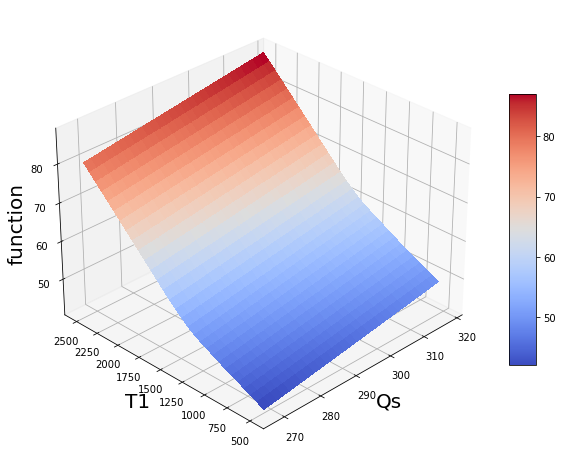

In [86]:
import numpy as np
import matplotlib.pyplot as plt


T1 = np.linspace( 268/tmed,318/tmed,30)
Qs = np.linspace(500/qsmed,2500/qsmed,30)
test = []
outpt=[]
Tmed = tmed
alphaPredicted = []

'''for i in range(len(T1)):
    test = [[ T1[i], 0.25, Qs[i] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alphaPredicted =  outpt[0][0]*almed
    print ('row [',i,'] data:  T1= ', T1[i]*Tmed, ', gam= ', 0.25*gamed, \
        ', qsol= ', Qs[i]*qsmed,\
        ',  predicted alpha = ', outpt[0][0]*almed)'''
    
function = np.zeros((len(Qs),len(T1)))
for i in range(len(T1)):
    for j in range(len(Qs)):
        test = [[ T1[i], 0.25/gamed, Qs[j] ]]
        testarray = np.array(test)
        outpt = model.predict(testarray)
        function[j][i] = outpt[0][0]*almed

T1 = np.linspace( 268,318,30)
Qs = np.linspace(500,2500,30)  

        
X,Y = np.meshgrid(T1,Qs)
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches(10,10)

        
surf = ax.plot_surface(X, Y, function, cmap=plt.cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_xlabel(r'Qs', fontsize=20)
ax.set_ylabel(r'T1', fontsize = 20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'function', fontsize = 20, rotation = 90)
fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(30,225)

plt.show()

---
### Task 2.3 a

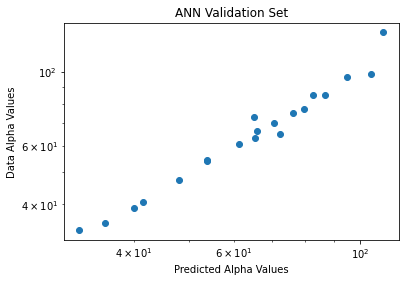

In [29]:
testData = []
testData.append([ 318.0 , 0.0 , 500.0 ])
testData.append([ 318.0 , 0.0 , 1500.0 ])
testData.append([ 318.0 , 0.0 , 2500.0 ])
testData.append([ 318.0 , 0.25 , 1500.0 ])
testData.append([ 318.0 , 0.5 , 500.0 ])
testData.append([ 318.0 , 0.5 , 1500.0 ])
testData.append([ 318.0 , 0.5 , 2500.0 ])
testData.append([ 303.0 , 0.0 , 1000.0 ])
testData.append([ 303.0 , 0.0 , 2000.0 ])
testData.append([ 303.0 , 0.25 , 1000.0 ])
testData.append([ 303.0 , 0.25 , 2000.0 ])
testData.append([ 303.0 , 0.5 , 1000.0 ])
testData.append([ 303.0 , 0.5 , 2000.0 ])
testData.append([ 288.0 , 0.0 , 500.0 ])
testData.append([ 288.0 , 0.0 , 2500.0 ])
testData.append([ 288.0 , 0.25 , 2500.0 ])
testData.append([ 288.0 , 0.5 , 1500.0 ])
testData.append([ 268.0 , 0.0 , 1500.0 ])
testData.append([ 268.0 , 0.25 , 2000.0 ])
testData.append([ 268.0 , 0.5 , 2500.0 ])

testDataOutput = []
testDataOutput.append([ 35.13 , 0.3808 ])
testDataOutput.append([ 47.46 , 0.3930 ])
testDataOutput.append([ 73.12 , 0.4061 ])
testDataOutput.append([ 66.34 , 0.4098 ])
testDataOutput.append([ 63.09, 0.4154 ])
testDataOutput.append([ 85.23 , 0.4197 ])
testDataOutput.append([131.32 , 0.4242 ])
testDataOutput.append([ 38.99 , 0.4012 ])
testDataOutput.append([ 53.80 , 0.4136 ])
testDataOutput.append([ 54.51 , 0.4215 ])
testDataOutput.append([ 75.22 , 0.4290 ])
testDataOutput.append([ 70.04, 0.4337 ])
testDataOutput.append([ 96.65, 0.4382 ])
testDataOutput.append([ 33.45 , 0.4091 ])
testDataOutput.append([ 60.80 , 0.4334 ])
testDataOutput.append([ 85.044, 0.4477])
testDataOutput.append([ 77.56 , 0.4516 ])
testDataOutput.append([ 40.68 , 0.4383 ])
testDataOutput.append([ 65.24 , 0.4628 ])
testDataOutput.append([ 98.23 , 0.4760 ])

alphaActual = []
alphaPredicted = []
test = []

for i in range(len(testData)):
    testData[i][0] = testData[i][0] / tmed
    testData[i][1] = testData[i][1] / gamed
    testData[i][2] = testData[i][2] / qsmed
    
for i in range(len(testDataOutput)):
    alphaActual.append(testDataOutput[i][0])
    testDataOutput[i][0] = testDataOutput[i][0] / almed
    testDataOutput[i][1] = testDataOutput[i][1] / efmed

for i in range(len(testData)):
    test = [[ testData[i][0], testData[i][1] , testData[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alphaPredicted.append(outpt[0][0])

for i in range(len(alphaPredicted)):
    alphaPredicted[i] = alphaPredicted[i] * almed

                          
plt.scatter(alphaPredicted, alphaActual)
plt.title('ANN Validation Set')
plt.xlabel('Predicted Alpha Values')
plt.ylabel('Data Alpha Values')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()
                          

---
### Task 2.3 b

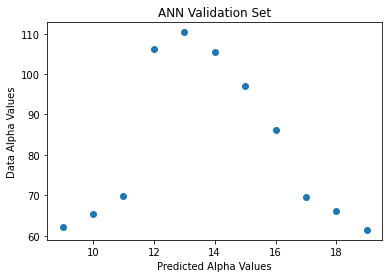

In [30]:
time = [9,10,11,12,13,14,15,16,17,18,19]
alphaTime = []

timeData = []
timeData.append([ 287.0 ,  0.5, 490.0])
timeData.append([ 295.0 ,  0.5, 720.0])
timeData.append([ 301.0 ,  0.5, 980.0 ])
timeData.append([ 305.0 ,  0.5, 2420.0])
timeData.append([ 307.0 ,  0.5, 2570.0])
timeData.append([ 308.0 ,  0.5, 2380.0])
timeData.append([ 308.0 ,  0.5, 2075.0])
timeData.append([ 305.0 ,  0.5, 1680.0])
timeData.append([ 295.0 ,  0.5, 1000.0])
timeData.append([ 292.0 ,  0.5, 800.0])
timeData.append([ 295.0 ,  0.5, 250.0])

for i in range(len(timeData)):
    timeData[i][0] = timeData[i][0] / tmed
    timeData[i][1] = timeData[i][1] / gamed
    timeData[i][2] = timeData[i][2] / qsmed
    
for i in range(len(timeData)):
    test = [[ timeData[i][0], timeData[i][1] , timeData[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alphaTime.append(outpt[0][0])

for i in range(len(alphaTime)):
    alphaTime[i] = alphaTime[i] * almed
    
plt.scatter(time, alphaTime)
plt.title('Daylong Variation of Operating Conditions')
plt.xlabel('Time')
plt.ylabel('Alpha Value')

#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()


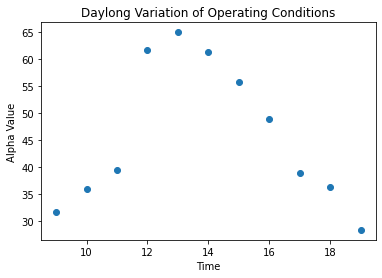

In [31]:
time = [9,10,11,12,13,14,15,16,17,18,19]
alphaTime = []

timeData = []
timeData.append([ 287.0 ,  0, 490.0])
timeData.append([ 295.0 ,  0, 720.0])
timeData.append([ 301.0 ,  0, 980.0 ])
timeData.append([ 305.0 ,  0, 2420.0])
timeData.append([ 307.0 ,  0, 2570.0])
timeData.append([ 308.0 ,  0, 2380.0])
timeData.append([ 308.0 ,  0, 2075.0])
timeData.append([ 305.0 ,  0, 1680.0])
timeData.append([ 295.0 ,  0, 1000.0])
timeData.append([ 292.0 ,  0, 800.0])
timeData.append([ 295.0 ,  0, 250.0])

for i in range(len(timeData)):
    timeData[i][0] = timeData[i][0] / tmed
    timeData[i][1] = timeData[i][1] / gamed
    timeData[i][2] = timeData[i][2] / qsmed
    
for i in range(len(timeData)):
    test = [[ timeData[i][0], timeData[i][1] , timeData[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alphaTime.append(outpt[0][0])

for i in range(len(alphaTime)):
    alphaTime[i] = alphaTime[i] * almed
    
plt.scatter(time, alphaTime)
plt.title('Daylong Variation of Operating Conditions')
plt.xlabel('Time')
plt.ylabel('Alpha Value')

#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()

In [ ]:
test = []
outpt=[]
Tmed = tmed

#first point (row [0])comparison of data and prediction
# put in a loop to print comparion for all data points

#test = [[ xarray[0][0] , xarray[0][1] , xarray[0][2] ]]
test = [[ xarray[0][0] , 0.25 , xarray[0][2] ]]

testarray = np.array(test)
outpt = model.predict(testarray)
print ('row [0] data:  T1= ', xarray[0][0]*Tmed, ', gam= ', xarray[0][1]*gamed, \
    ', qsol= ', xarray[0][2]*qsmed,', alpha= ', yarray[0][0]*almed,\
    ',  predicted alpha = ', outpt[0][0]*almed)

#20th point (row [20])comparison of data and prediction
test = [[ xarray[20][0] , 0.25 , xarray[20][2] ]]
testarray = np.array(test)
outpt = model.predict(testarray)
print ('row [20] data:  T1= ', xarray[20][0]*Tmed, ', gam= ', xarray[0][1]*gamed, \
    ', qsol= ', xarray[20][2]*qsmed,', alpha= ', yarray[20][0]*almed,\
    ',  predicted alpha = ', outpt[0][0]*almed)


--- 
### Task 2.4

In [53]:
'''>>>>> start CodeP2.4F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import statistics
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
from tensorflow import keras
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
# meadian values of input variables
'''Tmed = 293.
gamed = 0.25
qsmed = 1250.'''
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0, 0.0, 500.0], [ 318.0, 0.0, 1000.0]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])



'''#convert to:
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])'''

t1Values = []
gammaValues = []
qsolValues = []

for i in range(len(xdata)):
    t1Values.append(xdata[i][0])
    gammaValues.append(xdata[i][1])
    qsolValues.append(xdata[i][2])

tmed = statistics.median(t1Values)
gamed = statistics.median(gammaValues)
qsmed = statistics.median(qsolValues)
    
for i in range(len(xdata)):
    xdata[i][0] = xdata[i][0] / tmed
    xdata[i][1] = xdata[i][1] / gamed
    xdata[i][2] = xdata[i][2] / qsmed

xarray= np.array(xdata)
print (xdata)
print (xarray)
# meadian values of output variables
'''almed = 60.
efmed = 0.4'''
# alpha, effsys
ydata = []
ydata =  [[ 35.1316, 0.3808], [ 40.3764, 0.38686]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

'''#convert to:
ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])'''

alphaValues = []
nsysValues = []

for i in range(len(ydata)):
    alphaValues.append(ydata[i][0])
    nsysValues.append(ydata[i][1])

almed = statistics.median(alphaValues)
efmed = statistics.median(nsysValues)
    

for i in range(len(ydata)):
    ydata[i][0] = ydata[i][0] / almed
    ydata[i][1] = ydata[i][1] / efmed

yarray= np.array(ydata)
print (ydata)
print (yarray)

[[1.0761421319796953, 0.0, 0.3333333333333333], [1.0761421319796953, 0.0, 0.6666666666666666], [1.0761421319796953, 0.0, 1.0], [1.0761421319796953, 0.0, 1.3333333333333333], [1.0761421319796953, 0.0, 1.6666666666666667], [1.0761421319796953, 1.0, 0.3333333333333333], [1.0761421319796953, 1.0, 0.6666666666666666], [1.0761421319796953, 1.0, 1.0], [1.0761421319796953, 1.0, 1.3333333333333333], [1.0761421319796953, 1.0, 1.6666666666666667], [1.0761421319796953, 2.0, 0.3333333333333333], [1.0761421319796953, 2.0, 0.6666666666666666], [1.0761421319796953, 2.0, 1.0], [1.0761421319796953, 2.0, 1.3333333333333333], [1.0761421319796953, 2.0, 1.6666666666666667], [1.0253807106598984, 0.0, 0.3333333333333333], [1.0253807106598984, 0.0, 0.6666666666666666], [1.0253807106598984, 0.0, 1.0], [1.0253807106598984, 0.0, 1.3333333333333333], [1.0253807106598984, 0.0, 1.6666666666666667], [1.0253807106598984, 1.0, 0.3333333333333333], [1.0253807106598984, 1.0, 0.6666666666666666], [1.0253807106598984, 1.0,

### Task 2.4 Data Table

**Iteration one: the baseline neural network with the relu activation function changed to ELU.**  
* Minimum loss = 0.042138777673244476  
* Convergence time in epochs: 600  

**Iteration Two: the baseline neural network with an added layer and the number of neurons in the layers set to 12, 24, 12, 12, 2 (activation functions will be relu for all, as in the baseline).**  
* Minimum loss =   0.037394069135189056  
* Convergence time in epochs:  597  

**Iteration Three: the baseline neural network with the numbers of neurons changed to 8, 16, 8, 2.**   
* Minimum loss =   0.04750993102788925  
* Convergence time in epochs:  598  

**Iteration Four:  the baseline neural network with the number of neurons in the layers set to 20, 40, 20, 2.**   
* Minimum loss = 0.04378645494580269    
* Convergence time in epochs: 625

 

In [54]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(20, activation=K.relu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(40, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(20, activation =K.relu, kernel_initializer = initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [55]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [59]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 2/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 3/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 4/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 5/600
2/2 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 6/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0930
Epoch 7/600
2/2 [==============================] - 0s 10ms/step - loss: 0.0783
Epoch 8/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 9/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 10/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0780
Epoch 11/600
2/2 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 12/600
2/2 [==============================] - 0s 999us/step - loss: 0.0784
Epoch 13/600
2/2 [==============================] - 0s 2ms